In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Read the CSV File
df = pd.read_csv("WHO-covid19_dataset.csv")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [6]:
#Check the Rows and Columns
df.shape

(494400, 8)

In [4]:
#Check the Datatypes of the Datasets Columns
df.dtypes

Date_reported         object
Country_code          object
Country               object
WHO_region            object
New_cases            float64
Cumulative_cases       int64
New_deaths           float64
Cumulative_deaths      int64
dtype: object

In [5]:
#Describe the Datasets Columns
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.106650e+05,4.944000e+05,154088.000000,4.944000e+05
mean,3.695621e+03,2.056822e+06,46.081596,2.175612e+04
std,4.852712e+04,8.556337e+06,242.273984,8.704878e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,3.000000e+00,6.607000e+03,0.000000,4.100000e+01
50%,6.000000e+01,6.093950e+04,2.000000,6.900000e+02
75%,6.750000e+02,6.611030e+05,15.000000,7.996000e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.226890e+06


In [6]:
#Check the Null Value is Present or not.
#df.isnull()
df.isnull().sum()

Date_reported             0
Country_code           2060
Country                   0
WHO_region                0
New_cases            283735
Cumulative_cases          0
New_deaths           340312
Cumulative_deaths         0
dtype: int64

In [7]:
#Fillup the missing values

#For New_casses
df['New_cases'] = df.groupby('Country')['Cumulative_cases'].diff().fillna(df['Cumulative_cases'])
df['New_cases'] = df['New_cases'].clip(lower=0)

In [8]:
#For NewDeaths
df['New_deaths'] = df.groupby('Country')['Cumulative_deaths'].diff().fillna(df['Cumulative_deaths'])
#Replace a Negative Values if have
df['New_deaths'] = df['New_deaths'].clip(lower=0)

In [9]:
#Recheck the Missing Values

df.isnull().sum()

Date_reported           0
Country_code         2060
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [10]:
#Lets Start to make a Different Different Charts

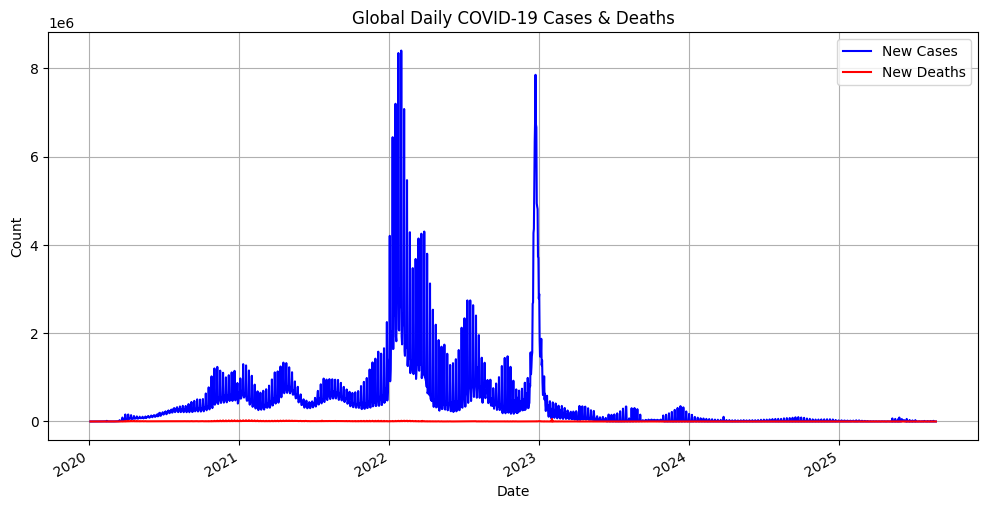

In [11]:
#Line chart of daily new cases and deaths globally
global_data = df.groupby('Date_reported')[['New_cases','New_deaths']].sum().reset_index()
global_data['Date_reported'] = pd.to_datetime(global_data['Date_reported'])

plt.figure(figsize=(12,6))
plt.plot(global_data['Date_reported'], global_data['New_cases'], label="New Cases", color="blue")
plt.plot(global_data['Date_reported'], global_data['New_deaths'], label="New Deaths", color="red")
plt.title("Global Daily COVID-19 Cases & Deaths")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.savefig("Global_Daily_COVID-19_Cases_&_Deaths.png",dpi=400,bbox_inches='tight')
plt.show()


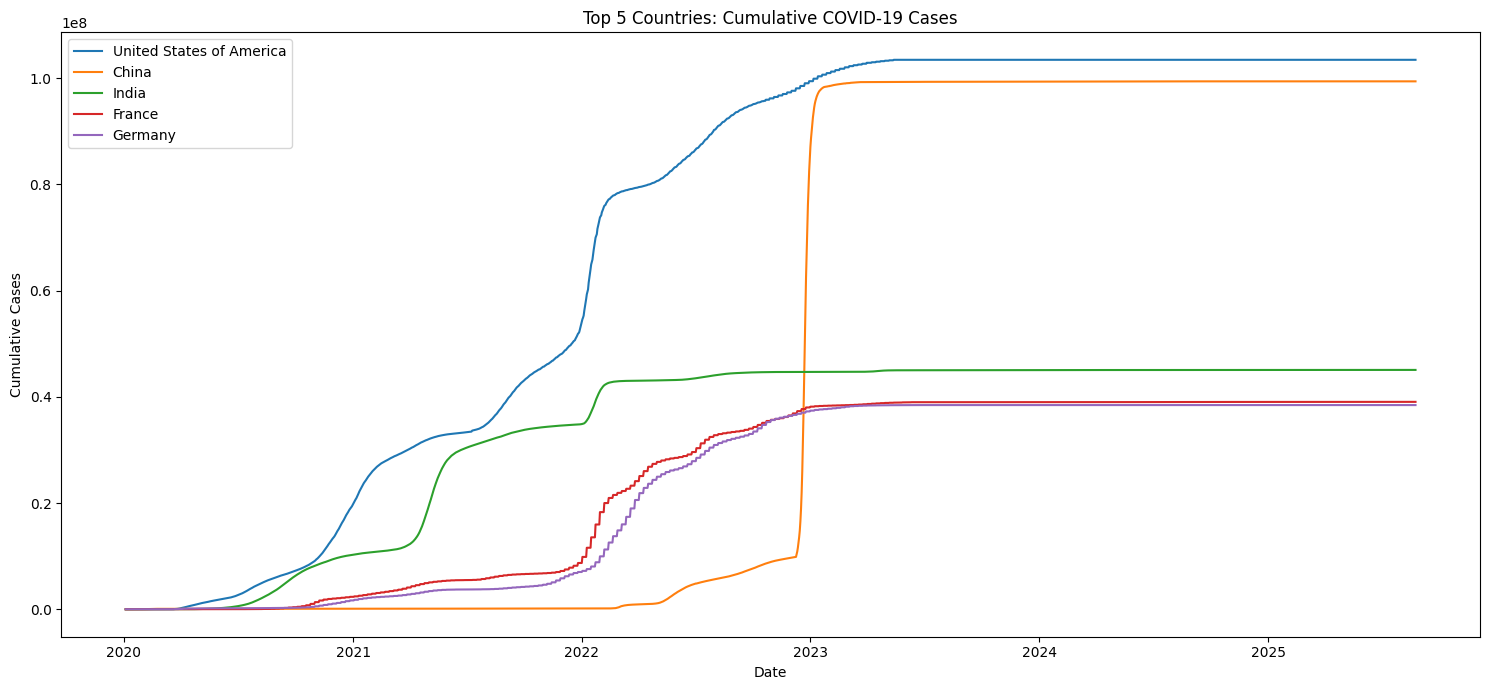

In [12]:
#Line chart for top 5 affected countries
top_countries = df.groupby('Country')['Cumulative_cases'].max().nlargest(5).index
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

plt.figure(figsize=(15,7))

for country in top_countries:
    plt.plot(
        df.loc[df['Country'] == country, 'Date_reported'],
        df.loc[df['Country'] == country, 'Cumulative_cases'],
        label=country
    )

plt.title("Top 5 Countries: Cumulative COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.legend()
plt.tight_layout()
plt.savefig("Top_5_Countries_Cumulative_COVID-19.png", dpi=400, bbox_inches='tight')
plt.show()


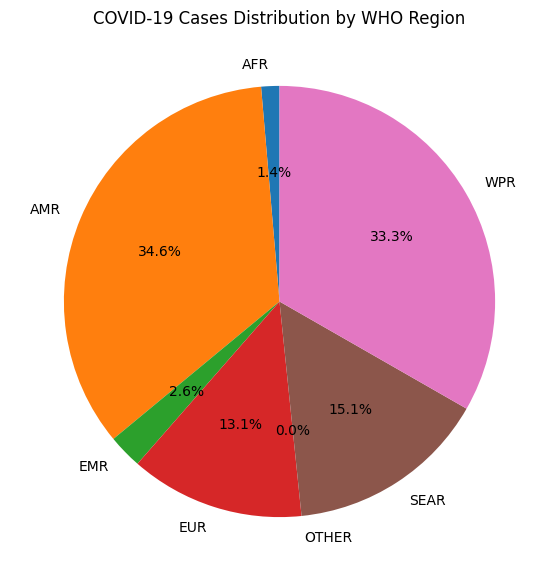

In [16]:
#Case Distribution by WHO Region
region_cases  = df.groupby("WHO_region")["Cumulative_cases"].max()
plt.figure(figsize=(15,7))
plt.pie(region_cases,labels=region_cases.index,autopct="%1.1f%%",startangle=90)
plt.title("COVID-19 Cases Distribution by WHO Region")
plt.savefig("Cases_Distribution_WHO.png",dpi=400,bbox_inches='tight')
plt.show()

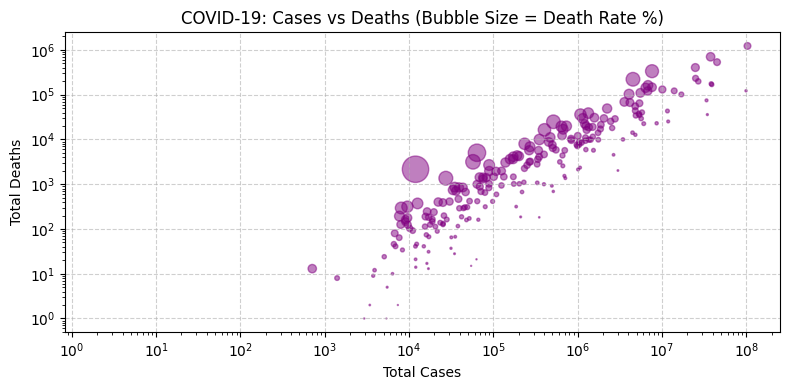

In [29]:
#COVID-19: Cases vs Deaths (Bubble Size = Death Rate %)
country_stats = df.groupby("Country")[["Cumulative_cases","Cumulative_deaths"]].max()
country_stats["Death_rate"] = (country_stats["Cumulative_deaths"]/country_stats["Cumulative_cases"])*100

plt.figure(figsize=(8,4))
plt.scatter(country_stats["Cumulative_cases"], country_stats["Cumulative_deaths"], 
            s=country_stats["Death_rate"]*20, alpha=0.5, color="purple")

plt.xscale("log")
plt.yscale("log")
plt.title("COVID-19: Cases vs Deaths (Bubble Size = Death Rate %)")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("COVID19_Cases_vs_Deaths_Bubble.png", dpi=400, bbox_inches="tight")
plt.show()


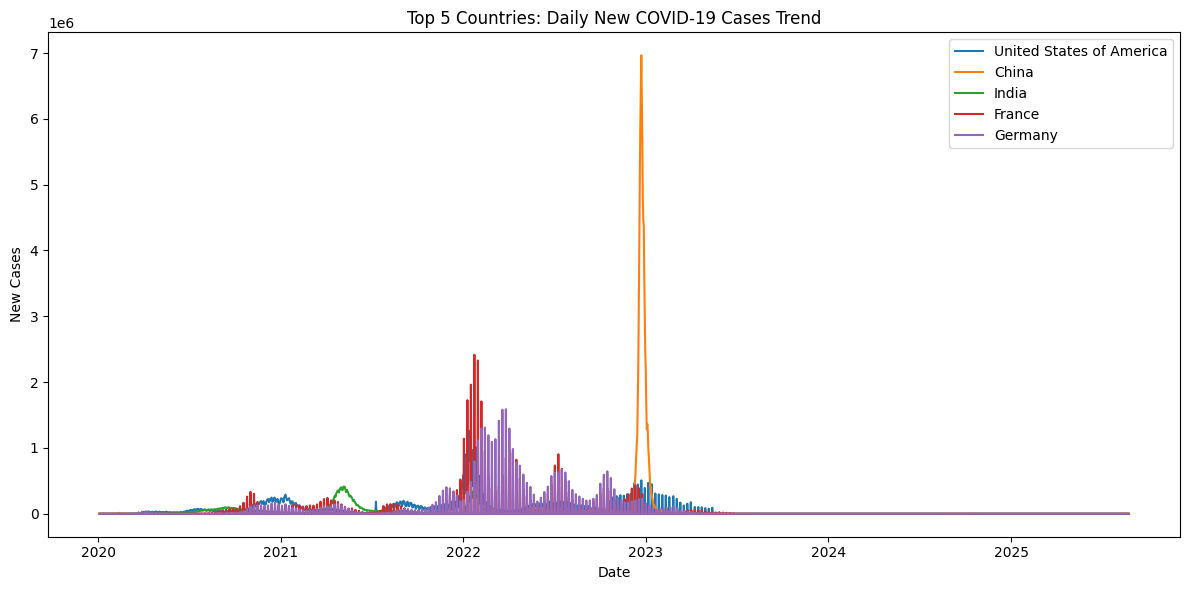

In [30]:
#Top 5 Countries: Daily New COVID-19 Cases Trend
top5 = df.groupby("Country")["Cumulative_cases"].max().nlargest(5).index

plt.figure(figsize=(12,6))
for country in top5:
    country_data = df[df["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.title("Top 5 Countries: Daily New COVID-19 Cases Trend")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.savefig("Top5_Countries_Daily_New_COVID19_Cases.png", dpi=400, bbox_inches="tight")
plt.show()
